In [6]:
import cv2
import numpy as np
import os
import glob
from matplotlib import pyplot as plt

In [8]:
def get_depth_map(img_left, img_right):
    # Load the stereo images
    left_image = cv2.imread(img_left, cv2.IMREAD_GRAYSCALE)
    right_image = cv2.imread(img_right, cv2.IMREAD_GRAYSCALE)

    # display
    plt.figure()
    plt.imshow(left_image)
    plt.figure()
    plt.imshow(right_image)

    # StereoBM - Block Matching
    stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)

    # calculate disparity map
    disparity = stereo.compute(left_image, right_image)

    # Normalize disparity vals to get depth map
    min_disparity = disparity.min()
    max_disparity = disparity.max()
    normalized_disparity = (disparity - min_disparity) / (max_disparity - min_disparity)

    # Convert normalized disparity map to depth map
    depth_map = 1.0 / (normalized_disparity + 0.01)

    return depth_map

In [4]:
# Specify the paths to the left and right images
# store all (jpg) photos into a list from pwd
path_dir = '/content'
dataPath = os.path.join(path_dir, '*.jpg')
files = glob.glob(dataPath)
list.sort(files) # serialing data
print(files)

['/content/plant_left.jpg', '/content/plant_mid.jpg', '/content/plant_right.jpg']


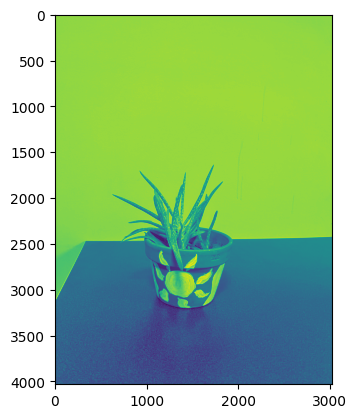

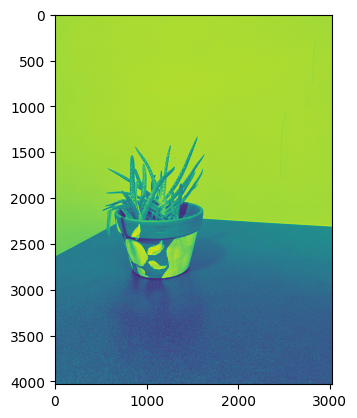

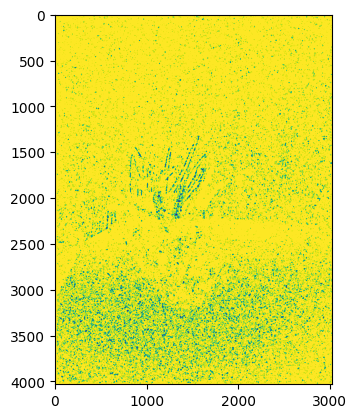

In [9]:
# Get the depth map
depth_map = get_depth_map(files[0], files[2])

# Display the depth map
plt.figure()
plt.imshow(depth_map)